# Analysing the host information including;age, location,gender and status for the possible prediction of outcome of recovery vs Death

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn

In [2]:
data = pd.read_csv('data_SARS-CoV-2_TestMetadata.csv')

In [3]:
# iterating the columns 
for col in data.columns: 
    print(col) 

record_date
virus_name
accession_id
type
lineage
passage_details_history
collection_date
area km2
density/km2
population
location
host
additional_location_info
gender
age
status
specimen_source
additional_host_information
outbreak
last_vaccinated
treatment
sequencing_technology
assembly_method
coverage
comment
originating_lab
originating_lab_address
sample_id_given_by_sample_provider
submitting_lab
submitting_lab_address
sample_id_given_by_submitting_lab
authors
submitter
submission_date
submitter_address
variants


# Preprocessing and cleaning the data

In [4]:
#important features
start_data_row = 0
Final_data_row = 255
Data = data.loc[ start_data_row:Final_data_row , ['location','gender','age','status']]
#change the index of the data according to the length of the new data
Data.index = range(len(Data))

In [5]:
#getting rid of NaN data
Data.dropna(subset = ['status'], inplace=True)

In [6]:
#getting rid of NaN data
Data.drop(Data.loc[Data['status']=='unknown'].index, inplace=True)
Data.index = range(len(Data))

In [7]:
#organizing the location based on the continent and country (For USA: continent,country, and state )
Location = Data.location.str.split('/')
listToStr_location = list()
for i in range(len(Location)):  
    if Location[i][1:2][0]!=' USA ':
        Location[i] = Location[i][0:2]
        listToStr_location. append(' '.join([str(elem) for elem in Location[i]]))
    else:
        Location[i] = Location[i][0:3]
        listToStr_location. append(' '.join([str(elem) for elem in Location[i]]))
listToStr_location

['Africa   Egypt',
 'Africa   Nigeria ',
 'Asia   Bangladesh ',
 'Asia   Bangladesh ',
 'Asia   Bangladesh ',
 'Asia   Bangladesh ',
 'Asia   Bangladesh ',
 'Asia   Bangladesh ',
 'Asia   Bangladesh ',
 'Asia   Bangladesh ',
 'Asia   Bangladesh ',
 'Asia   China ',
 'Asia   China ',
 'Asia   China ',
 'Asia   China ',
 'Asia   China ',
 'Asia   China ',
 'Asia   China ',
 'Asia   China ',
 'Asia   China ',
 'Asia   China ',
 'Asia   China ',
 'Asia   China ',
 'Asia   China ',
 'Asia   China ',
 'Asia   China ',
 'Asia   China ',
 'Asia   China ',
 'Asia   China ',
 'Asia   China ',
 'Asia   China ',
 'Asia   Georgia ',
 'Asia   Georgia ',
 'Asia   Georgia ',
 'Asia   Georgia ',
 'Asia   Hong Kong',
 'Asia   Hong Kong',
 'Asia   Hong Kong',
 'Asia   Hong Kong',
 'Asia   Hong Kong',
 'Asia   Hong Kong',
 'Asia   Hong Kong',
 'Asia   Hong Kong',
 'Asia   Hong Kong',
 'Asia   India ',
 'Asia   India ',
 'Asia   India ',
 'Asia   India ',
 'Asia   India ',
 'Asia   India ',
 'Asia   India 

In [8]:
Data.location =listToStr_location
Data.groupby('location')
Data

,location,gender,age,status
0,Africa Egypt,Male,5,Hospitalized
1,Africa Nigeria,Female,30,Not Hospitalized
2,Asia Bangladesh,Male,32,Live
3,Asia Bangladesh,Male,47,Released
4,Asia Bangladesh,Male,44,Released
...,...,...,...,...
199,South America Colombia,Male,61,Home
200,South America Colombia,Male,50,Home
201,South America Colombia,Female,44,Home
202,South America Ecuador,Male,40,Hospitalized


In [9]:
#replacing the age that were in months to year
Data['age'] = Data['age'].str.replace('months','')
Data['age'] = Data['age'].str.replace('month','')
for i in range(1,len(Data)):
    index_1 = Data.age[i].find(',') 
    index_2 = Data.age[i].find('-') 
    index_3 = Data.age[i].find('unknown') 
    if index_1!=-1:
        Data.age[i] = Data.age[i][:index_1]
        Data.age[i] = int(float(Data.age[i])/12)
    if index_2!=-1:
        Data.age[i] = int((float(Data.age[i][index_2+1:])+float(Data.age[i][:index_2]))/2)
    if index_3!=-1:
        Data.age[i] = 'NaN'


In [10]:
#deleting the >, 's and s from age
Data['age'] = Data['age'].str.replace('>','')
Data['age'] = Data['age'].str.replace('s','')
Data['age'] = Data['age'].str.replace("'",'')


### Imputing the unknown data using KNN

In [11]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5, weights="uniform")
imputer.fit(Data[['age']])
Data['age']=imputer.transform(Data[['age']])

In [12]:
#labeling the data
for i in range(1,len(Data)):
    index_gender = Data.gender[i].find('unknown') 
    if index_gender!=-1:
        Data.gender[i] = 'NaN'
Data.gender.value_counts()

C:\Users\Azadeh\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


Male      107
Female     93
male        2
NaN         2
Name: gender, dtype: int64

In [13]:
Data.replace(['female','Female'],value= [1,1], inplace=True)
Data.replace(['male','Male'],value= [0,0], inplace=True)        

In [14]:
imputer_2= KNNImputer(n_neighbors=5, weights="uniform")
imputer_2.fit(Data[['gender']])
Data['gender']=imputer_2.transform(Data[['gender']])


In [15]:
#Labeling
Data.replace(['Deceased'],value= [1], inplace=True)
Data.status[Data['status'] != 1]=0

C:\Users\Azadeh\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [16]:
#Finding unknown data
Data.loc[Data['gender']=='unknown']

C:\Users\Azadeh\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


,location,gender,age,status


In [17]:
#using dummies instead of location data for ML input
Data_model = pd.concat([pd.get_dummies(Data[['location']]), Data[['gender','age','status']]], axis=1)
Data_model.head()

,location_Africa Egypt,location_Africa Nigeria,location_Asia Bangladesh,location_Asia China,location_Asia Georgia,location_Asia Hong Kong,location_Asia India,location_Asia Iran,location_Asia Israel,location_Asia Japan,...,location_Oceania Australia,location_Oceania Guam,location_Oceania New Zealand,location_South America Brazil,location_South America Colombia,location_South America Ecuador,location_South America Uruguay,gender,age,status
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,5.0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1.0,30.0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,32.0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,47.0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,44.0,0


In [18]:
#checking the balance in the data
Data_model['status'].value_counts()

0    172
1     32
Name: status, dtype: int64

In [19]:
#Separating target (label) data
X = Data_model.drop('status',axis=1).astype(float)
y = Data_model.status
y=y.astype(int)
y.value_counts()


0    172
1     32
Name: status, dtype: int64

In [20]:
#splitting features and the label: 20% test data and 80% assigned to training data
# split into train/test sets with same class ratio
from sklearn.model_selection import KFold, cross_val_score, train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5, stratify=y)

In [21]:
#balancing the data
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
# define oversampling strategy
over = RandomOverSampler(sampling_strategy='minority')
# fit and apply the transform
X_train, y_train = over.fit_resample(X_train, y_train)
# define undersampling strategy
under = RandomUnderSampler(sampling_strategy='majority')
# fit and apply the transform
X_train, y_train = under.fit_resample(X_train, y_train)


C:\Users\Azadeh\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\Azadeh\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\Azadeh\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.base module is  deprecated in version 0.22 and will be removed

In [22]:
#Scaling the data to standarize them
#Here caling reduced the iteration number from 200 to 50
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [23]:
#fitting the model and get the conversion probabilities. 
#predit_proba() function of our model assigns probability for each row:
from sklearn import tree
from sklearn.metrics import accuracy_score
model = tree.DecisionTreeClassifier(max_depth=20)
model.fit(X_train,y_train)
y_hat = model.predict(X_test)
dt_probs = model.predict_proba(X_test)
#Return the mean accuracy on the given test data and taraining data to see if we have overfitting.score clculates R^2
print('R^2 _train=',model.score(X_train, y_train))
print('R^2 _test=',model.score(X_test, y_test))
print('Test accuracy score =',accuracy_score(y_test, y_hat))


R^2 _train= 1.0
R^2 _test= 0.9512195121951219
Test accuracy score = 0.9512195121951219


In [24]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_hat})
df.head(25)

,Actual,Predicted
142,0,0
41,0,0
44,0,0
81,0,0
124,0,0
74,0,0
134,0,0
131,0,0
191,0,0
114,1,1


In [25]:
import sklearn.metrics as metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_hat))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_hat))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_hat)))

Mean Absolute Error: 0.04878048780487805
Mean Squared Error: 0.04878048780487805
Root Mean Squared Error: 0.2208630521496931


In [26]:
#Cross validation
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_train, y_train, cv=10)
print('Cross-Validation Accuracy Scores', scores)
scores = pd.Series(scores)
print('CV-scores_min = ',scores.min())
print('CV_scores_mean =', scores.mean())
print('CV_scores_max =', scores.max())

Cross-Validation Accuracy Scores [0.96428571 1.         0.96428571 0.96428571 0.92592593 0.96296296
 0.96296296 0.92592593 1.         0.96296296]
CV-scores_min =  0.9259259259259259
CV_scores_mean = 0.9633597883597884
CV_scores_max = 1.0


In [27]:
from sklearn.metrics import precision_recall_curve
# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_hat)

In [28]:
from sklearn.metrics import f1_score
# calculate F1 score
f1 = f1_score(y_test, y_hat)
print('f1 score =', f1)

f1 score = 0.8


In [29]:
#Area Under ROC Curve (AUROC) metric
from sklearn.metrics import roc_auc_score
dt_probs = model.predict_proba(X_test)
# Keep only the positive class
#lr_probs = [p[1] for p in lr_probs]
dt_probs
print( 'roc_auc =', roc_auc_score(y_test, dt_probs[:,1]) )

roc_auc = 0.8333333333333333


No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.833


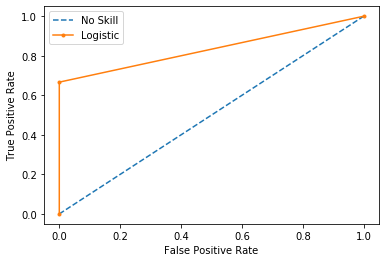

In [30]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
dt_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
dt_probs = dt_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
dt_auc = roc_auc_score(y_test, dt_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (dt_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(dt_fpr, dt_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

Logistic: f1=0.800 auc=0.858


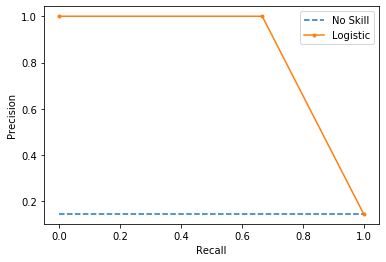

In [31]:
from sklearn.metrics import auc
dt_probs = model.predict_proba(X_test)
dt_precision, dt_recall, _ = precision_recall_curve(y_test, dt_probs[:,1])
dt_f1, dt_auc = f1_score(y_test, y_hat), auc(dt_recall, dt_precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (dt_f1, dt_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(dt_recall, dt_precision, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()


In [32]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_hat})
df.head(25)

,Actual,Predicted
142,0,0
41,0,0
44,0,0
81,0,0
124,0,0
74,0,0
134,0,0
131,0,0
191,0,0
114,1,1
